# Motivation of Tutorial

In this tutorial, an overview of Linear Models is given along with two approach of finding model parameters,namely, Pseudo Inverse of a Matrix and Gradient Descent. By doing so, I aim to give something back to the phenomen of free online education.

# Linear Models

In this tutorial, we give an overview of Linear Models.
+ **Linear Models**
    + Linear Regression
    + Linear Classification
    + Logistic Regression

+ **Learning parameters of models**
    + Pseudo Inverse
    + Gradient Descent

# Linear Models

Liner model refers to a model that is a linear combination of the input variables.

$$ s = \sum_{i=0} ^M w_i x_i = w^T \textbf{X}$$

where $M$ denotes the number of coefficents/parameters of the model. Note that $\epsilon$ noise is simply ignored.

+ Linear Regression output: 
$$ h(x) = s $$

+ Linear Classification output: 
$$ h(x) = sign \Bigg(s\Bigg) $$

+ Logistic Regression output: 
$$ h(x) = \Theta \Bigg(s\Bigg) $$

where $\Theta$ is logistic/Sigmoid function and has the following form:

$$ \Theta(s) = \frac{e^s} {1+e^s} $$


## What does actually mean to say Linear model ?!

+ Linear regression implements the following function as mentioned above
$$ \sum_{i=0} ^N w_i x_i $$
it is imporant to realize that this function is linear in the $\textbf{w}$ and $x_i$. As we go from the definition of a function to learning, being linear refers to be learn in the weights/parameters to be learned.

# How well does $ h(x)= w^T x $ approximate $ f(x) $ on a point ?


+ The quality of the approxumation is evaluated via **Squared Error** ,i.e. the difference between real value and our estimation on a point.

$$ (h(x)-f(x))^2 $$

# How well does $ h(x)= \vec{w}^T x $ approximate $ f(x) $ on all seen data points ?

$$ E_{in} (w) = \frac{1}{N} \sum_{x=1} ^N (h(x_i)-f(x_i))^2 $$

$$E_{in} (w)= \frac{1}{N} ||\textbf{X}\vec{w} - \vec{y}||^2$$

# How to minimize $E_{in}$ ?
+ By using Pseudo-Inverse of $\textbf{X}$
+ By using Gradient Descent Algorithm$


## Pseudo-Inverse of $\textbf{X}$

$$ E_{in} (w)= \frac{1}{N} ||\textbf{X}\vec{w} - \vec{y}||^2$$

$$ \nabla E_{in} (w) = \frac{2}{N} \textbf{X}^T (\textbf{X}\vec{w} - \vec{y}) = 0 $$

$$ \textbf{X}^T \textbf{X} \vec{w} = \textbf{X}^T \vec{y}$$

$$\vec{w}= \textbf{X}^\dagger \vec{y} $$ $$ $$
$$ \text{where  } \textbf{X}^\dagger = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T $$

$$ \textbf{X}^\dagger \text{is the }\textbf{pseudo-inverse } \text{of  }\textbf{X} $$

## Gradient Descent Algorithm

**EXPLAIN LATER**
a first-order iterative optimization algorithm for finding the minimum of a function

# Let's implement it

## Dot Product

In [379]:
features = np.array([1,3,5]).reshape((1, 3))
weights= np.array([4,-2,-1]).reshape((3,1))

print(features@weights==np.dot(features,weights))
features@weights==features.dot(weights)

[[ True]]


array([[ True]])

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import math
from sklearn.metrics import mean_squared_error
np.random.seed(2)

In [16]:
class DataGeneratingProcess(object):
    def __init__(self,f=lambda x: 5,noise=0):
        # This is the true unknown function we are trying to approximate
        self.f=f
        self.s=noise # noise variance.
        self.X=None
        self.y=None
    
    def generate_regression(self,N,T=(-4,4)):
        # Sample some input points and noisy versions of the function evaluated at  these points.
        self.X = np.random.uniform(T[0], T[1], size=(N,1))
        self.y = self.f(self.X) + self.s*np.random.randn(N)
        return self.X,self.y

    def generate_classification(self,N,T=(-4,4)):
        # Sample some input points and noisy versions of the function evaluated at  these points.
        self.X = np.random.uniform(T[0], T[1], size=(N,1))
        #TODO include noise latter
        self.y = self.f(self.X) #+ self.s*np.random.randn(N)
        return self.X,self.y
    
    def plot(self):
        plt.scatter(self.X, self.y)
        plt.xlabel('observations')
        plt.ylabel('unknown function')
        plt.axis('tight')
        plt.show()

In [143]:
class LinearModel(object):
    
    def __init__(self,num_epoch=100,gradient_update=0.01):
        self.weights=None
        self.num_epoch=num_epoch
        self.gradient_update=gradient_update
        
    def gradient_descent(self,X_t,y):
        # initialize a list to store the loss value for each epoch
        lossHistory = []

        # loop over the desired number of epochs
        for epoch in np.arange(0, self.num_epoch):
            # take the dot product between our features `X` and the
            # weight matrix `W`, then pass this value through the
            # sigmoid activation function, thereby giving us our
            # predictions on the dataset
            #preds = sigmoid_activation(X.dot(W))
            preds =X_t.dot(self.weights)

            # now that we have our predictions, we need to determine
            # our `error`, which is the difference between our predictions
            # and the true values
            error = preds - y

            # given our `error`, we can compute the total loss value as
            # the sum of squared loss -- ideally, our loss should
            # decrease as we continue training
            loss = np.sum(error ** 2)
            lossHistory.append(loss)
            #print("[INFO] epoch #{}, loss={:.7f}".format(epoch + 1, loss))

            # the gradient update is therefore the dot product between
            # the transpose of `X` and our error, scaled by the total
            # number of data points in `X`
            gradient = X_t.T.dot(error) / X_t.shape[0]

            # in the update stage, all we need to do is nudge our weight
            # matrix in the opposite direction of the gradient (hence the
            # term "gradient descent" by taking a small step towards a
            # set of "more optimal" parameters
            self.weights += -self.gradient_update * gradient
        self.weights=np.around(self.weights,5)
        print('Learned weights: ',self.weights)
        
    def fit_regression(self,X,y,init_pseudo_inverse=True):
        if init_pseudo_inverse:
            # Insert a column of 1's as the first entry in the feature vector.
            # Hence, we can treat the bias as a parameter *within* the weight matrix rather than an entirely separate variable
            X_t = np.column_stack( (np.ones((len(X),1)) , X ) ) 
            self.weights = np.dot( np.linalg.pinv(X_t), y)
        else:
            X_t= np.column_stack( (np.ones((len(X),1)) , X ) )
            self.weights = np.random.uniform(size=(X_t.shape[1],))
        print('Weights are initialized with pseudo inverse:',init_pseudo_inverse)
        self.gradient_descent(X_t,y)
        
        print('Mean squared Error Logistic Regression: ',mean_squared_error(self.weights[0] + self.weights[1]*X,y))
        
    def fit_polynomial(self,X,y,d=3):
        print('Fitting polynomials ',d)
        p = np.poly1d(np.polyfit(X, y, d))
        print('Mean squared Error Logistic Regression: ',mean_squared_error(p(X),y))
        plt.scatter(X, y)
        _=np.linspace(X.min(), X.max(), num=10)
        
        plt.plot(_, p(_),c='r')
        plt.xlabel('observations')
        plt.ylabel('Outputs')
        plt.axis('tight')
        plt.show()
        
    def fit_pseudo_inverse(self,X,y):
        # 1s inserted into X as we have to also learn the intercept of function
        X_t = np.column_stack( (np.ones((len(X),1)) , X ) ) 
        self.weights = np.dot( np.linalg.pinv(X_t), y) # weights 
        print( 'w0 = %.6f, w1 = %.6f ' %(self.weights[0],self.weights[1]) ) 
        print('Mean squared Error of Pseudo Inverse: ',mean_squared_error(self.weights[0] + self.weights[1]*X,y))
        
    def plot(self,X):
        
        plt.plot(X, self.weights[0] + self.weights[1]*X,c='r')# label='h(x) = %.2f + %.2f x' %(w[0], w[1]))
        plt.scatter(X, y)
        plt.xlabel('observations')
        plt.ylabel('Outputs')
        plt.axis('tight')
        plt.show()

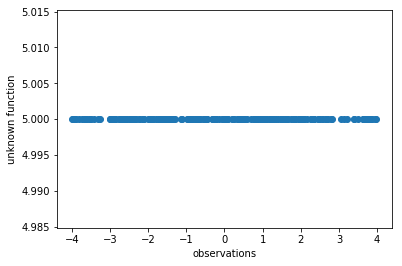

w0 = 5.000000, w1 = -0.000000 
Mean squared Error of Pseudo Inverse:  7.888609052210118e-31


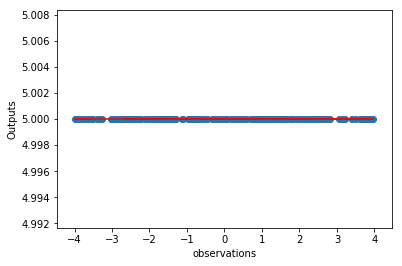

Weights are initialized with pseudo inverse: True
Learned weights:  [ 5. -0.]
Mean squared Error Logistic Regression:  0.0


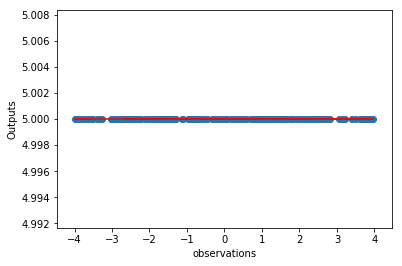

Weights are initialized with pseudo inverse: False
Learned weights:  [ 5. -0.]
Mean squared Error Logistic Regression:  0.0


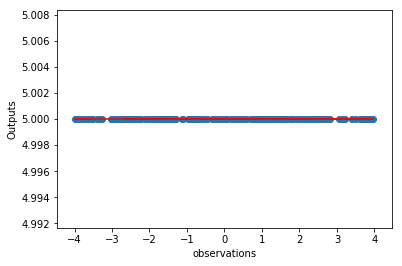

In [144]:
g=DataGeneratingProcess()
X,y=g.generate_regression(200)
g.plot()

model=LinearModel()
model.fit_pseudo_inverse(X.copy(),y.copy())
model.plot(X.copy())

model=LinearModel()
model.fit_regression(X.copy(),y.copy())
model.plot(X.copy())

model=LinearModel(num_epoch=20000)
model.fit_regression(X,y,init_pseudo_inverse=False)
model.plot(X.copy())


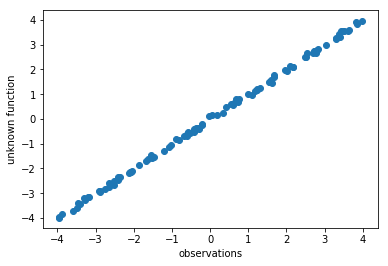

w0 = -0.013875, w1 = 1.000208 
Mean squared Error of Pseudo Inverse:  0.004143443296961388


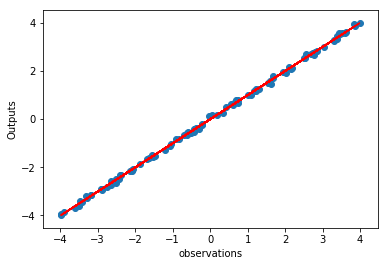

Weights are initialized with pseudo inverse: True
Learned weights:  [-0.01388  1.00021]
Mean squared Error Logistic Regression:  0.004143443335701391


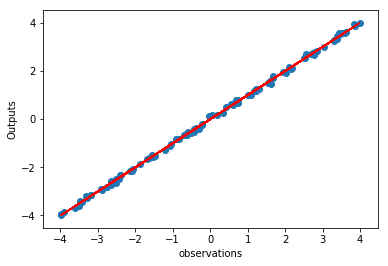

Weights are initialized with pseudo inverse: False
Learned weights:  [0.33941 0.99238]
Mean squared Error Logistic Regression:  0.12897299701667847


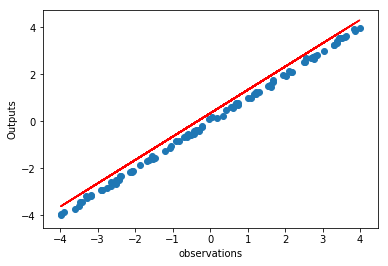

In [19]:
g=DataGeneratingProcess(f=lambda x:np.array(x).flatten(),noise=0.06)
X,y=g.generate_regression(100)
g.plot()

model=LinearModel()
model.fit_pseudo_inverse(X.copy(),y.copy())
model.plot(X.copy())

model=LinearModel()
model.fit_regression(X.copy(),y.copy())
model.plot(X.copy())

model=LinearModel(num_epoch=100)
model.fit_regression(X,y,init_pseudo_inverse=False)
model.plot(X.copy())


It is important to understand that the behaviour of learned weights/regression coefficents/weights. More specifically, if $w_1$ positive, then we expect the output to increase as the input increases. Hence, the input and output is positively correlated.

w0 = 6.121584, w1 = 0.439041 
Mean squared Error of Pseudo Inverse:  24.549528372394633


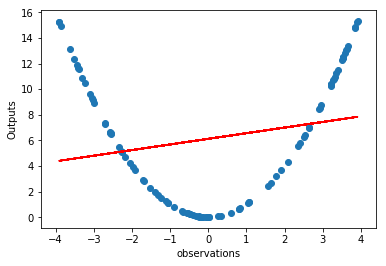

Weights are initialized with pseudo inverse: True
Learned weights:  [6.12158 0.43904]
Mean squared Error Logistic Regression:  24.54952837241418


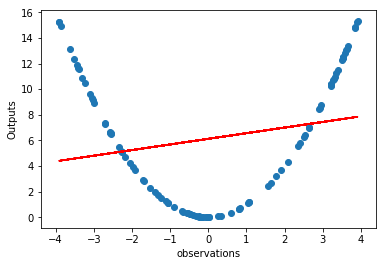

Weights are initialized with pseudo inverse: False
Learned weights:  [3.99458 0.51144]
Mean squared Error Logistic Regression:  29.05080911652386


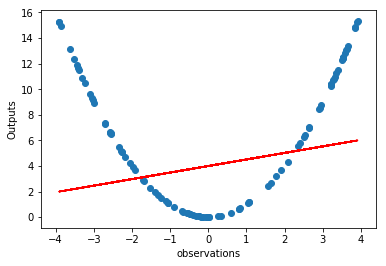

Fitting polynomials  1
Mean squared Error Logistic Regression:  24.54952837239464


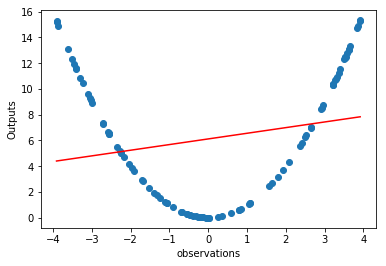

Fitting polynomials  2
Mean squared Error Logistic Regression:  1.5565127362096322e-29


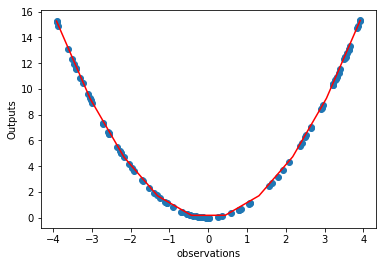

In [20]:
g=DataGeneratingProcess(f = lambda x: (x**2).flatten())
X,y=g.generate_regression(100)

model=LinearModel()
model.fit_pseudo_inverse(X.copy(),y.copy())
model.plot(X.copy())

model=LinearModel()
model.fit_regression(X.copy(),y.copy())
model.plot(X.copy())

model=LinearModel(num_epoch=100)
model.fit_regression(X.copy(),y.copy(),init_pseudo_inverse=False)
model.plot(X.copy())


model=LinearModel()
model.fit_polynomial(X.copy().flatten(),y.copy(),d=1)

model=LinearModel()
model.fit_polynomial(X.copy().flatten(),y.copy(),d=2)



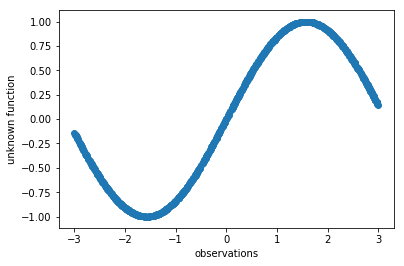

w0 = -0.024390, w1 = 0.334686 
Mean squared Error of Pseudo Inverse:  0.1630782349866842


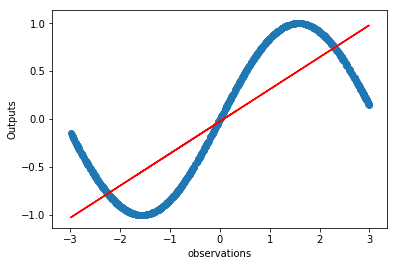

Weights are initialized with pseudo inverse: True
Learned weights:  [-0.02439  0.33469]
Mean squared Error Logistic Regression:  0.16307823503340094


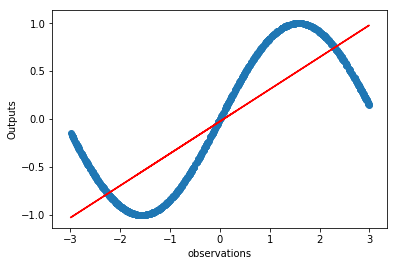

Weights are initialized with pseudo inverse: False
Learned weights:  [0.3061  0.34219]
Mean squared Error Logistic Regression:  0.2723357675157184


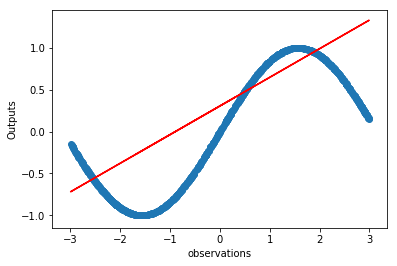

In [21]:
g=DataGeneratingProcess(f = lambda x: (np.sin(x)).flatten())
X,y=g.generate_regression(1000,T=(-3,3))
g.plot()

model=LinearModel()
model.fit_pseudo_inverse(X.copy(),y.copy())
model.plot(X.copy())

model=LinearModel()
model.fit_regression(X.copy(),y.copy())
model.plot(X.copy())

model=LinearModel(num_epoch=100)
model.fit_regression(X.copy(),y.copy(),init_pseudo_inverse=False)
model.plot(X.copy())

Fitting polynomials  2
Mean squared Error Logistic Regression:  0.16248349881775806


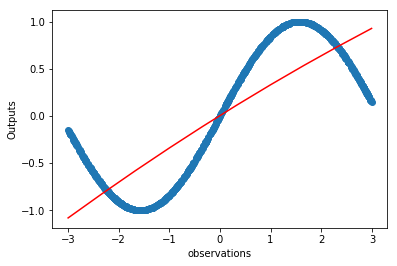

Fitting polynomials  3
Mean squared Error Logistic Regression:  0.0029593834766094684


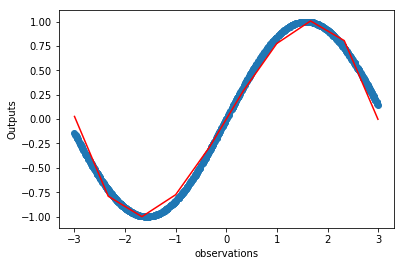

In [22]:
model=LinearModel()
model.fit_polynomial(X.copy().flatten(),y.copy(),d=2)

model=LinearModel()
model.fit_polynomial(X.copy().flatten(),y.copy(),d=3)

### Classification Problem

In [394]:

class LogisticReg(LinearModel):

    def __init__(self,num_epoch=50):
        LinearModel.__init__(self,num_epoch)
        self.lossHistory=[]
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def fit(self,X,y):
        X_t= np.column_stack( (np.ones((len(X),1)) , X ) )
        self.weights = np.random.uniform(size=(X_t.shape[1],1))
        self.gradient_descent(X_t,y)
        
    def predict(self,X):
        X_t= np.column_stack( (np.ones((len(X),1)) , X ) )
        return self.activation_func(X_t.dot(self.weights))
            
        
    def gradient_descent(self,X_t,y):

        for epoch in np.arange(0, self.num_epoch):
            

            activations = self.sigmoid(X_t@self.weights)

            preds=(0.5<activations).astype(int)
            
            error=preds-y
            loss=np.sum(np.absolute(error))
   
            self.lossHistory.append(loss)
            #print("[INFO] epoch #{}, loss={:.7f}".format(epoch + 1, loss))

            gradient = X_t.T.dot(error) / X_t.shape[0]

            self.weights += -self.gradient_update * gradient
        
        self.weights=np.around(self.weights,5)
        print('Learned weights: ',self.weights)

Learned weights:  [[0.07017]
 [0.82319]]


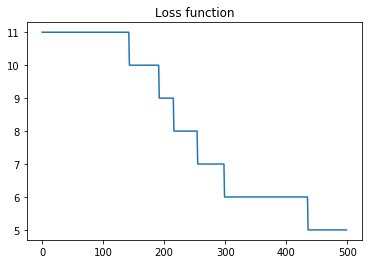

In [399]:
g=DataGeneratingProcess(f = lambda x:(x.mean()<x).astype(int))
X,y=g.generate_classification(100,T=(-10,10))
#g.plot()

lr=LogisticReg(500)
lr.fit(X.copy(),y.copy())

plt.title('Loss function')
plt.plot(lr.lossHistory)

Learned weights:  [[0.2587 ]
 [0.82085]]


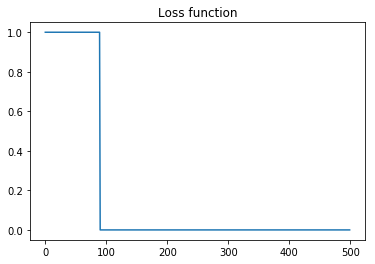